In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
from sklearn.cross_validation import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('forestfires.csv')

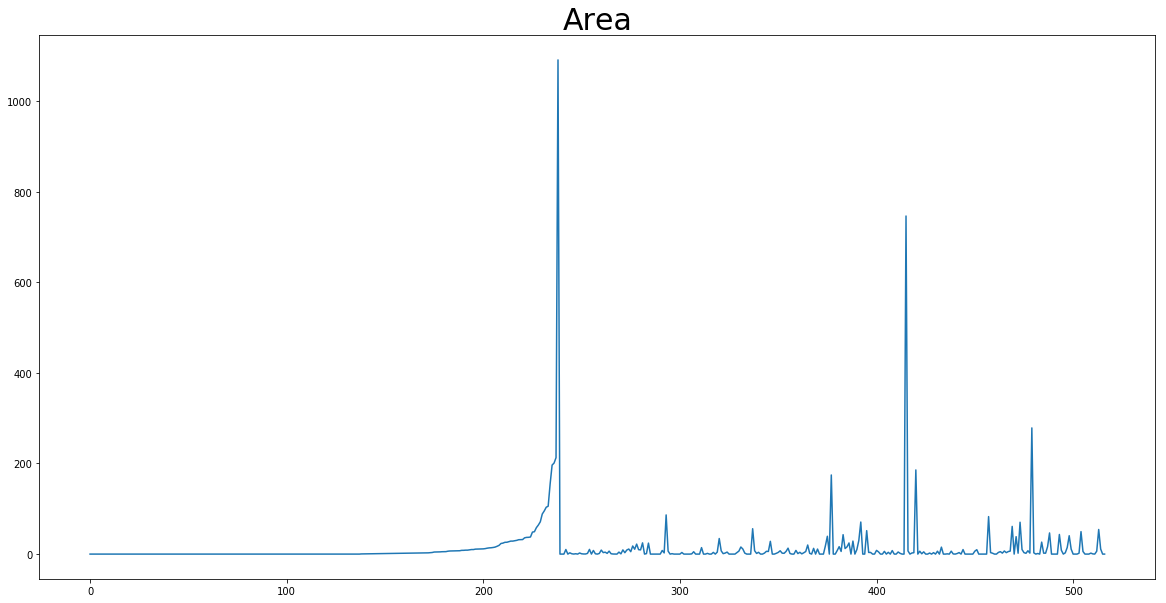

In [41]:
plt.figure(figsize=(20,10))
plt.title('Area',fontsize=30)
plt.plot(df['area'])

In [37]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Object convert to value
since sklearn doesn't accept string type value

In [5]:
df['month'].replace( ('jan','feb','mar','apr','may', 'jun','jul','aug','sep', 'oct', 'nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df['day'].replace( ('fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'),(5,2,6,7,1,3,4),inplace=True)

In [35]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null int64
day      517 non-null int64
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [8]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
df_data = df.drop(['area'],axis=1)
df_target = df['area']
#df_data = normalize(df_data, norm='l2')

In [10]:
for col in df_data.columns:
    scaler = MinMaxScaler()
    scaler.fit(df_data[col].values.reshape(-1,1))
    df_data[col]=scaler.transform(df_data[col].values.reshape(-1,1))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
df_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.750,0.428571,0.181818,0.666667,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000
1,0.750,0.285714,0.818182,0.166667,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000
2,0.750,0.285714,0.818182,0.833333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000
3,0.875,0.571429,0.181818,0.666667,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125
4,0.875,0.571429,0.181818,1.000000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000


In [12]:
df_target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.3)
print y_test

85        0.00
287       0.00
370      11.06
70        0.00
181       5.44
21        0.00
313       0.00
296       0.90
26        0.00
341       0.00
257       0.68
93        0.00
470       0.00
41        0.00
101       0.00
454       0.00
189       8.24
506       0.00
337      56.04
398       0.00
248       0.00
295       0.00
162       1.94
230      88.49
340       3.93
13        0.00
334       0.00
391      30.18
297       0.00
159       1.69
        ...   
408       7.80
477       7.36
169       2.55
108       0.00
10        0.00
357       0.00
329       3.33
44        0.00
400       8.16
128       0.00
393       0.00
476       1.76
495       0.00
122       0.00
2         0.00
194      10.01
74        0.00
442       3.35
3         0.00
103       0.00
275       5.38
238    1090.84
267       0.00
332      11.22
363       2.93
312       0.00
486       2.00
47        0.00
99        0.00
345       5.83
Name: area, dtype: float64


In [14]:
df['month'].unique()
df['day'].unique()

array([5, 2, 6, 7, 1, 3, 4])

In [15]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


mean square error:  13031.4637333
mean accuracy: -0.159926936746


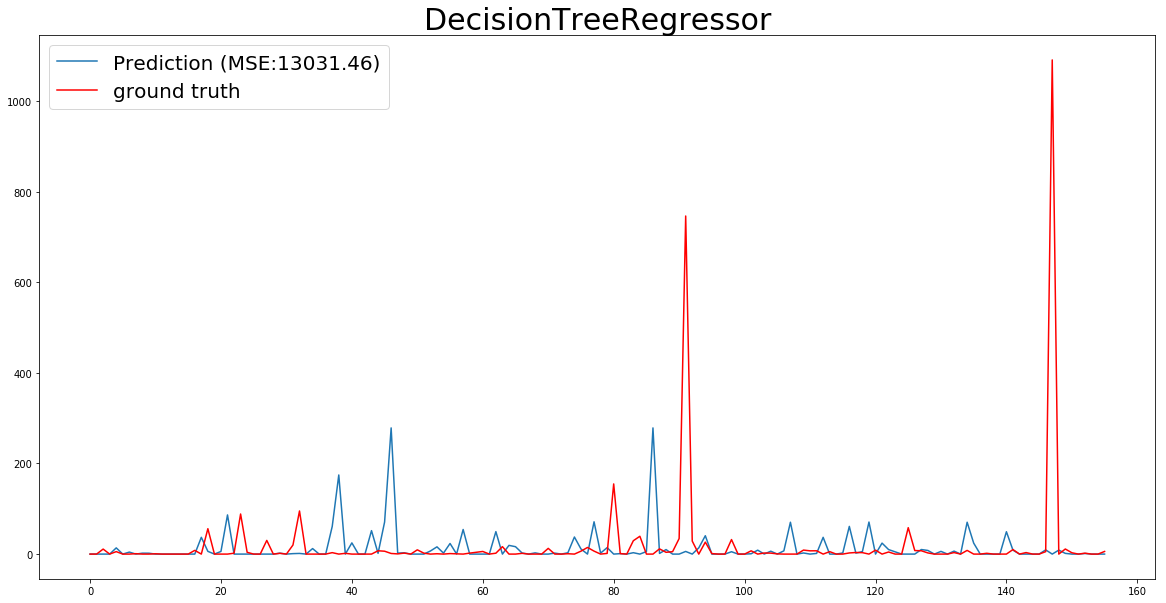

In [42]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

index = np.arange(0, len(x_test),1)
mse = mean_squared_error(y_test,regressor.predict(x_test)) 
print 'mean square error: ',mse

plt.figure(figsize=(20,10))
plt.title('DecisionTreeRegressor',fontsize=30)
plt.plot(index,regressor.predict(x_test),label="Prediction (MSE:%0.2f)" %mse)
plt.plot(index,y_test,c='r',label="ground truth")
plt.legend(fontsize = 20)
print 'mean accuracy:',regressor.score(x_test,y_test)

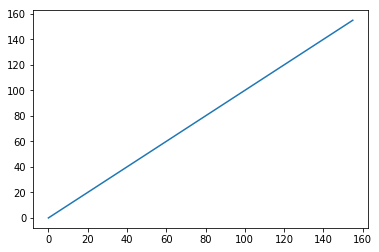

In [17]:
plt.plot(index,index)

mean square error : -0.04007385623
mean square error:  11684.9469635


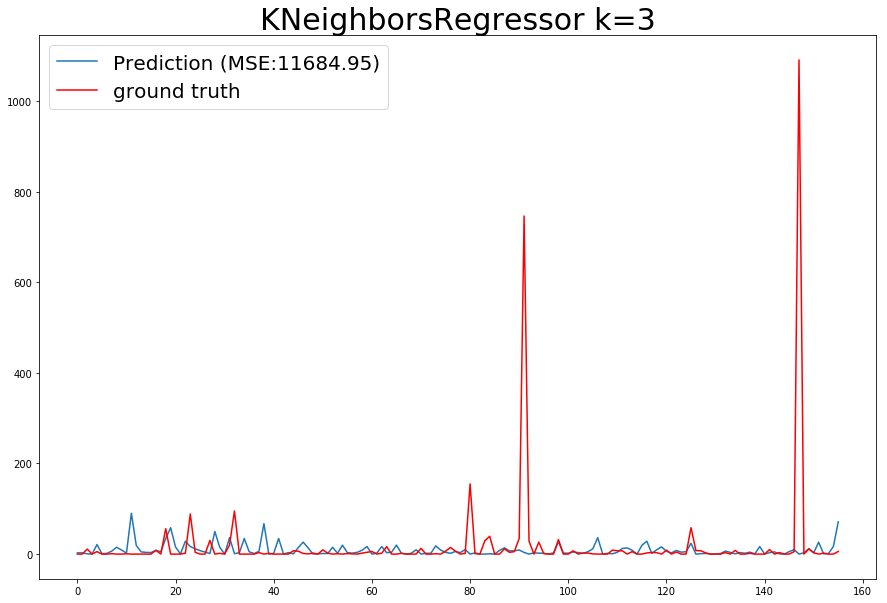

In [50]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train,y_train)
print 'mean square error :',neigh.score(x_test,y_test)

mse = mean_squared_error(y_test,neigh.predict(x_test)) 
print 'mean square error: ',mse

plt.figure(figsize=(15,10))
plt.title('KNeighborsRegressor k=3',fontsize=30)
plt.plot(index,neigh.predict(x_test),label="Prediction (MSE:%0.2f)" %mse)
plt.plot(index,y_test,c='r',label="ground truth")
plt.legend(fontsize = 20)

In [19]:
y_train

4        0.00
364      5.65
178      4.88
163      1.95
255      0.00
188      7.40
343      2.18
433     15.34
153      1.46
271      9.27
107      0.00
0        0.00
83       0.00
465      6.84
134      0.00
496      2.77
210     24.23
315      0.00
100      0.00
390      9.96
18       0.00
209     23.41
492      0.00
301      3.52
462      3.71
362      0.52
490      0.00
205     14.57
510      0.43
293     86.45
        ...  
24       0.00
459      1.94
300      0.00
446      0.00
82       0.00
38       0.00
494      8.59
262      4.25
491      0.00
211     26.00
263      1.56
499     10.82
274     11.19
215     28.66
513     54.29
92       0.00
432      0.00
451      9.71
379      0.00
119      0.00
514     11.16
479    278.53
298      0.00
277     10.73
91       0.00
143      0.71
90       0.00
374     18.30
331     15.64
154      1.46
Name: area, dtype: float64

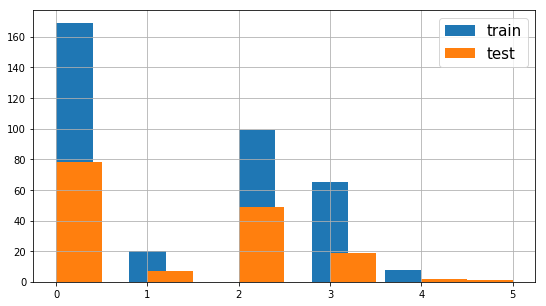

In [20]:
def area_to_class(y):
    if y==0:
        return 0
    elif y>0 and y<=1:
        return 1
    elif y>1 and y<=10:
        return 2
    elif y>10 and y<=100:
        return 3
    elif y>100 and y<=1000:
        return 4
    elif y>1000:
        return 5
    
y_train_class = y_train.apply(area_to_class)
y_test_class = y_test.apply(area_to_class)
y_train_class.hist(figsize = (9,5), label='train')
y_test_class.hist(figsize = (9,5), label = 'test')
plt.legend(fontsize = 15)

In [21]:
clf = GaussianNB()
clf.fit(x_train, y_train_class)
print clf.score(x_test, y_test_class)

0.25641025641


In [22]:
clf.predict(x_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 4, 2, 4, 2, 2, 1, 4, 2, 2, 4, 1, 2, 2, 4, 4, 2, 4, 2, 0, 2, 4,
       1, 4, 3, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 4, 2, 1, 2, 2, 4, 2, 2, 0,
       2, 2, 2, 4, 1, 2, 2, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 4])

(array([   7.,   12.,  112.,    1.,   24.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

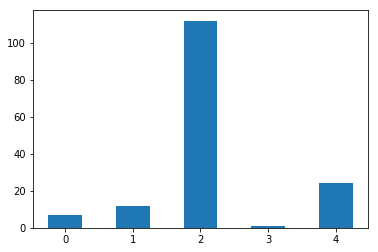

In [64]:
plt.hist(clf.predict(x_test),bins=[0,1,2,3,4,5],rwidth=0.5,align='left')

### Define categorical features & continuous features

In [23]:
x_cate_train = x_train[['X','Y','month','day']]
x_conti_train = x_train[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']]
x_cate_test = x_test[['X','Y','month','day']]
x_conti_test = x_test[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']]

In [24]:
clf_Gaussian = GaussianNB()
clf_Gaussian.fit(x_conti_train, y_train_class)
print clf_Gaussian.score(x_conti_test, y_test_class)

0.269230769231


In [25]:
clf_Laplace = MultinomialNB()
clf_Laplace.fit(x_cate_train, y_train_class)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
print clf_Laplace.score(x_cate_test, y_test_class)

0.5


In [54]:
y_Laplace = clf_Laplace.predict_proba(x_cate_test).argmax(1)
print y_Laplace

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


(array([ 156.,    0.,    0.,    0.,    0.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

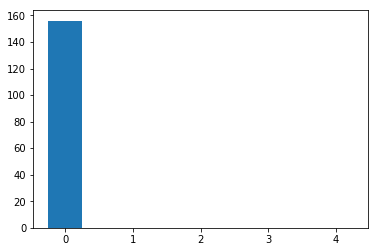

In [62]:
plt.hist(y_Laplace,bins=[0,1,2,3,4,5],rwidth=0.5,align='left')

In [61]:
y_Gaussian = clf_Gaussian.predict_proba(x_conti_test).argmax(1)
print y_Gaussian

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2 2 4 2 2
 1 4 2 2 2 2 2 2 4 2 4 3 2 2 2 2 2 2 1 2 0 0 2 2 2 2 2 2 4 2 2 3 2 2 2 4 2
 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2
 4 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 0 2 2 2
 2 2 2 0 1 2 2 2]


(array([   5.,    3.,  130.,    2.,   16.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

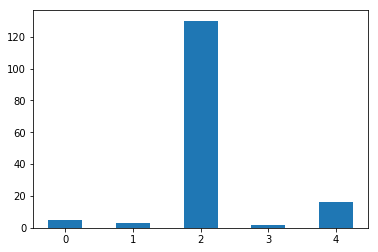

In [63]:
plt.hist(y_Gaussian,bins=[0,1,2,3,4,5],rwidth=0.5,align='left')

In [28]:
print clf_Laplace.predict_proba(x_cate_test)

[[ 0.47065242  0.05399789  0.27197818  0.18222413  0.02114739]
 [ 0.4757378   0.05398746  0.26843971  0.18058839  0.02124664]
 [ 0.47764023  0.05336045  0.26714077  0.18104768  0.02081086]
 [ 0.47879502  0.05320256  0.26995009  0.17774694  0.02030538]
 [ 0.44163821  0.06152637  0.28947206  0.18113598  0.02622738]
 [ 0.44876619  0.05953126  0.28473674  0.18201221  0.02495359]
 [ 0.45684339  0.05779381  0.2808587   0.18093965  0.02356446]
 [ 0.483462    0.05224866  0.26463839  0.17963741  0.02001354]
 [ 0.46737568  0.05562938  0.27302004  0.18161713  0.02235777]
 [ 0.44324771  0.06125825  0.28865836  0.18080064  0.02603503]
 [ 0.47831569  0.05287565  0.2672554   0.18110448  0.02044879]
 [ 0.47581374  0.05394112  0.27021212  0.17914715  0.02088587]
 [ 0.48766662  0.05139332  0.26294634  0.17860124  0.01939248]
 [ 0.47709381  0.05309789  0.26919085  0.18021843  0.02039902]
 [ 0.45754056  0.05727513  0.28101061  0.18101664  0.02315706]
 [ 0.46782706  0.05496703  0.2750992   0.18054089  0.02

In [29]:
arr1 = np.array([1,2,3,4,5])
arr2 = np.array([1,2,3,4,5])
arr1 * arr2

array([ 1,  4,  9, 16, 25])

In [60]:
y_pred = (clf_Gaussian.predict_proba(x_conti_test)*clf_Laplace.predict_proba(x_cate_test)/clf_Gaussian.class_prior_).argmax(1)


In [59]:
print 'MultinomialNB model score:',accuracy_score(y_test_class, y_Laplace)
print 'GaussianNB model score:',accuracy_score(y_test_class, y_Gaussian)
print 'Mixed model score:',accuracy_score(y_test_class, y_pred)

MultinomialNB model score: 0.5
GaussianNB model score: 0.269230769231
Mixed model score: 0.269230769231
